In [2]:
import os 
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [1]:
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

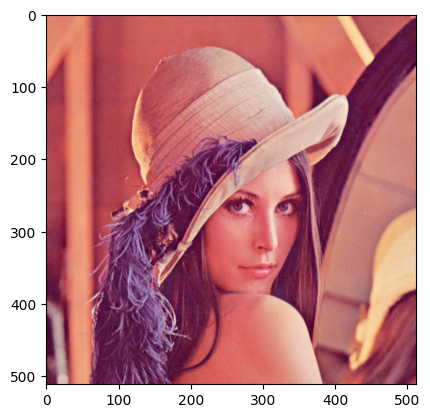

In [3]:
image  = load_image("lenna.png")
plt.imshow(image)

In [4]:
def add_noise(image , rows=image.shape[0], cols=image.shape[1]):
    noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
    return image + noise

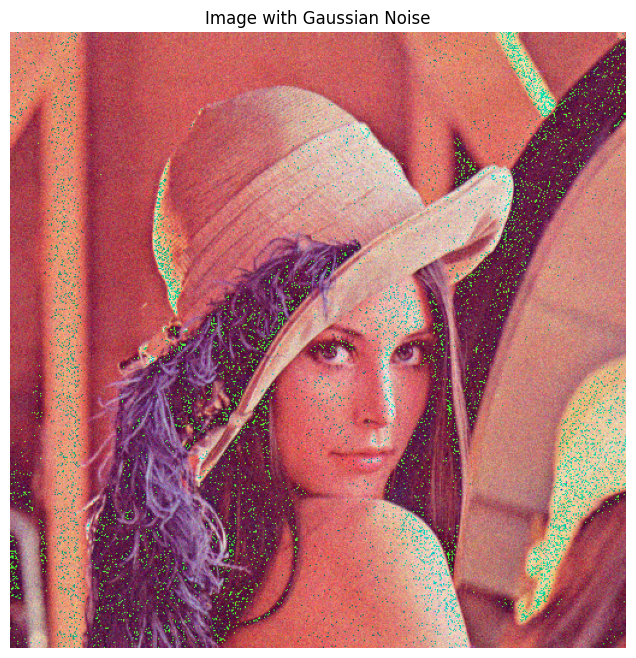

In [5]:
image_noise = add_noise(image)
plt.figure(figsize=(10, 8))
plt.imshow(image_noise)
plt.title('Image with Gaussian Noise')
plt.axis('off')
plt.show()

## Denoise

In [6]:
def Denoise_mean(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))
def Denoise_gaussian(image, kernel_size=5):
    return cv2.GaussianBlur(image,(kernel_size,kernel_size),sigmaX=4,sigmaY=4)
def Denoise_median(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

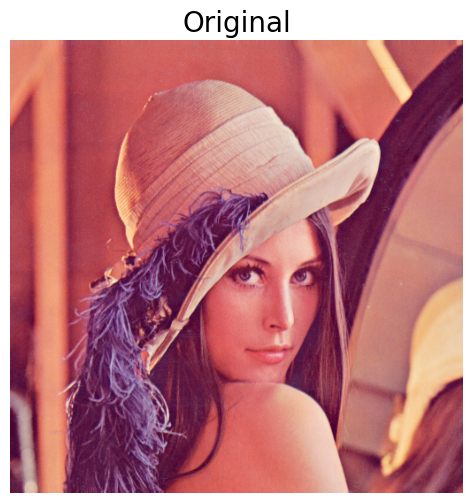

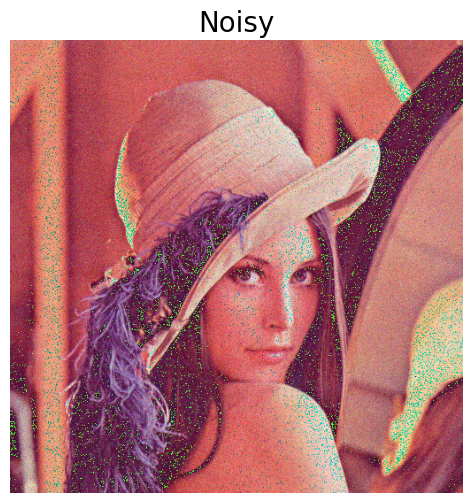

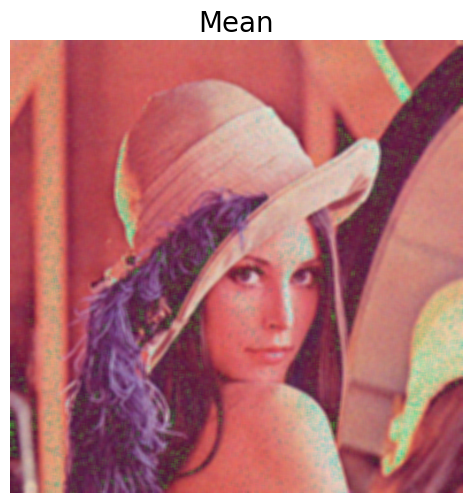

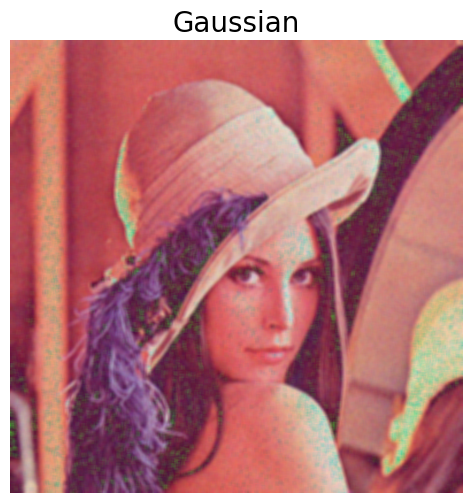

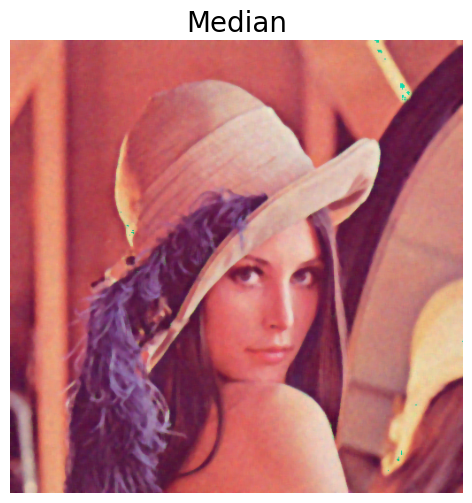

In [7]:

image_mean = Denoise_mean(image_noise, kernel_size=5)
image_gaussian = Denoise_gaussian(image_noise, kernel_size=5)
image_median = Denoise_median(image_noise, kernel_size=5)

for i, img in enumerate([image, image_noise, image_mean, image_gaussian, image_median]):
    plt.figure(figsize=(20, 20))
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(['Original', 'Noisy', 'Mean', 'Gaussian', 'Median'][i], fontsize=20)
    plt.axis('off')

In [76]:
def image_sharpening(image):
    kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
    return cv2.filter2D(image, -1, kernel)

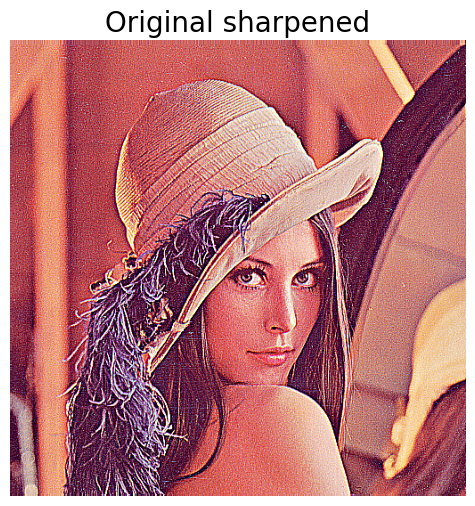

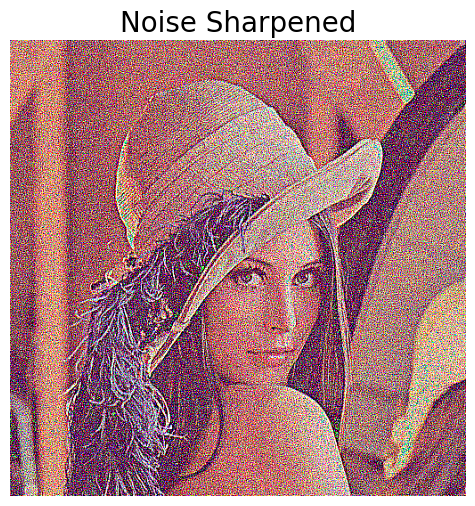

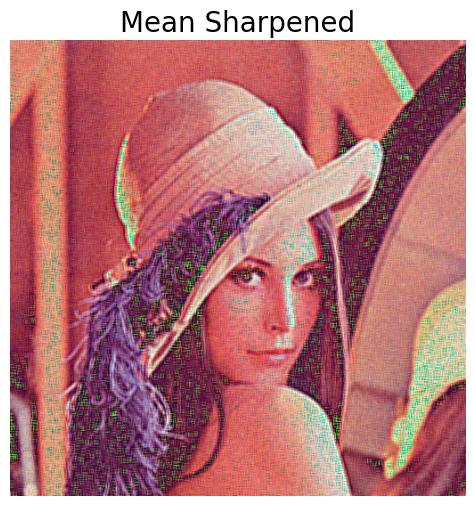

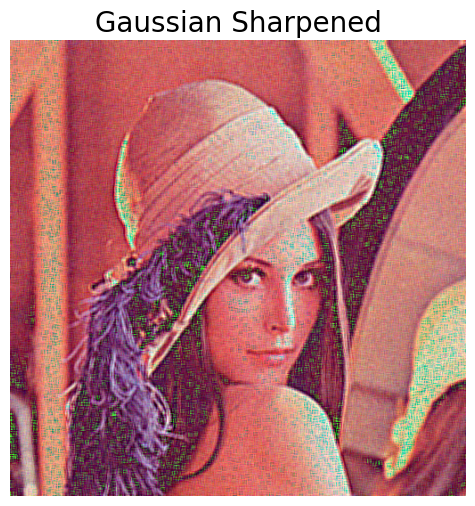

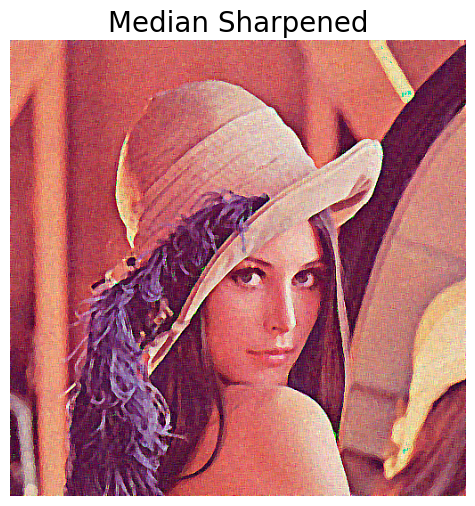

In [77]:
image_noise_sharp = image_sharpening(image_noise)
image_mean_sharp = image_sharpening(image_mean)
image_gaussian_sharp = image_sharpening(image_gaussian)
image_median_sharp = image_sharpening(image_median)
image_sharp = image_sharpening(image_noise)
original_sharp = image_sharpening(image)
for i, img in enumerate([original_sharp, image_sharp, image_mean_sharp, image_gaussian_sharp, image_median_sharp]):
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(['Original sharpened', 'Noise Sharpened', 'Mean Sharpened', 'Gaussian Sharpened', 'Median Sharpened'][i], fontsize=20)
    plt.axis('off')

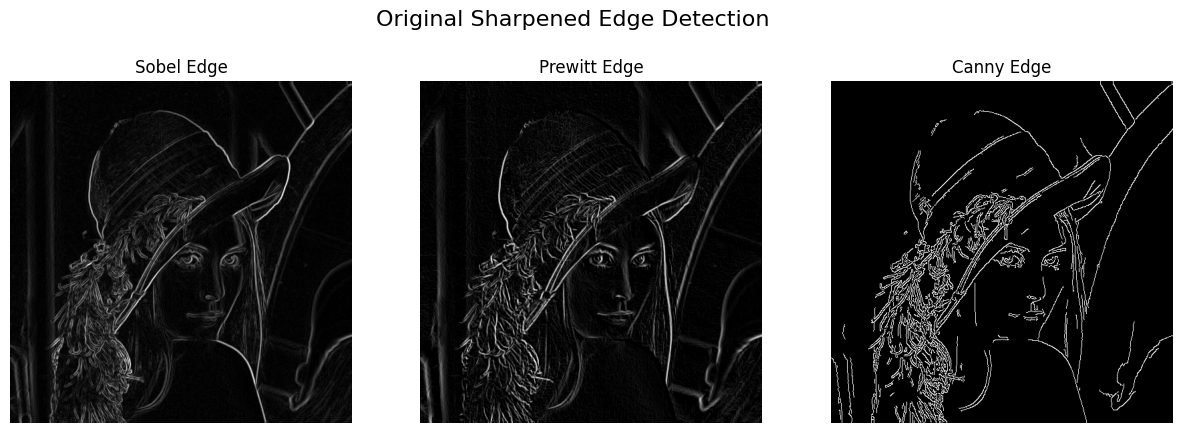

In [9]:
def edge_detection_filters(image, title):
    # Convert to grayscale
    img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Sobel filter
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)

    # Prewitt filter
    prewittx = cv2.filter2D(img, -1, np.array([[-1,0,1],[-1,0,1],[-1,0,1]]))
    prewitty = cv2.filter2D(img, -1, np.array([[1,1,1],[0,0,0],[-1,-1,-1]]))
    prewitt = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))

    # Canny edge
    canny = cv2.Canny(img, 100, 200)

    # Display results
    plt.figure(figsize=(15,5))
    plt.suptitle(title, fontsize=16)
    plt.subplot(1,3,1)
    plt.imshow(sobel, cmap='gray')
    plt.title('Sobel Edge')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(prewitt, cmap='gray')
    plt.title('Prewitt Edge')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(canny, cmap='gray')
    plt.title('Canny Edge')
    plt.axis('off')

    plt.show()

# Apply edge detection to sharpened images

image_original_edge = edge_detection_filters(image, title='Original Sharpened Edge Detection')


